## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
%matplotlib notebook


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [6]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [9]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [10]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [12]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [16]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [17]:

# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history1 = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 11s 188us/step - loss: 1.3074 - acc: 0.6848 - val_loss: 0.8180 - val_acc: 0.8364
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.7217 - acc: 0.8404 - val_loss: 0.6102 - val_acc: 0.8618
Epoch 3/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.5905 - acc: 0.8580 - val_loss: 0.5276 - val_acc: 0.8735
Epoch 4/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.5279 - acc: 0.8671 - val_loss: 0.4818 - val_acc: 0.8802
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.4898 - acc: 0.8738 - val_loss: 0.4517 - val_acc: 0.8860
Epoch 6/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.4637 - acc: 0.8789 - val_loss: 0.4301 - val_acc: 0.8895
Epoch 7/20
60000/60000

In [0]:
%matplotlib inline

In [0]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.grid()
  fig.canvas.draw()

In [20]:
print(len(history1.history['val_loss']))

20


Test score: 0.3363473850727081
Test accuracy: 0.9093


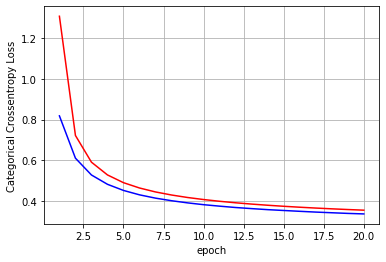

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax1 = plt.subplots(1,1)
ax1.set_xlabel('epoch') ; ax1.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x1 = list(range(1,nb_epoch+1))

vy1 = history1.history['val_loss']
ty1 = history1.history['loss']
ax1.plot(x1, vy1, 'b', label="Validation Loss")
ax1.plot(x1, ty1, 'r', label="Train Loss")
plt.grid()
fig.canvas.draw()
plt.show();


 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [22]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,))) 
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/step - loss: 2.2707 - acc: 0.2212 - val_loss: 2.2289 - val_acc: 0.3618
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 2.1886 - acc: 0.4307 - val_loss: 2.1386 - val_acc: 0.5356
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 2.0813 - acc: 0.5460 - val_loss: 2.0068 - val_acc: 0.5419
Epoch 4/20
60000/60000 [==============================] - 2s 29us/step - loss: 1.9258 - acc: 0.6055 - val_loss: 1.8199 - val_acc: 0.6352
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.7172 - acc: 0.6523 - val_loss: 1.5887 - val_acc: 0.6586
Epoch 6/20
60000/60000 [==============================] - 2s 30us/step - loss: 1.4841 - acc: 0.6941 - val_loss: 1.3559 - val_acc: 0.7194
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 1.2701 - acc: 0.7367 - val_loss: 1.1605 - val_acc

In [0]:
# list of epoch numbers


# print(history.history.keys()) 
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


Test score: 0.4614129983663559
Test accuracy: 0.8786


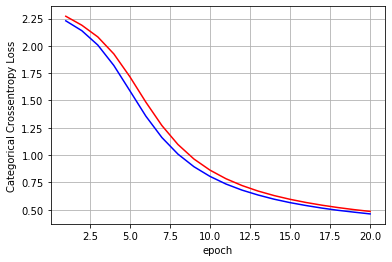

In [24]:
x = list(range(1,nb_epoch+1)) 
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss') 


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
fig.canvas.draw()


In [0]:
import matplotlib.pyplot as plt


In [0]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


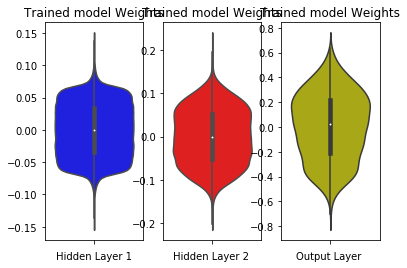

In [27]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [28]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.5336 - acc: 0.8603 - val_loss: 0.2545 - val_acc: 0.9255
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.2227 - acc: 0.9348 - val_loss: 0.1845 - val_acc: 0.9438
Epoch 3/20
60000/60000 [==============================

Test score: 0.07249096132973064
Test accuracy: 0.9815


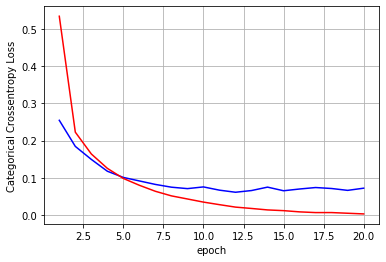

In [29]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

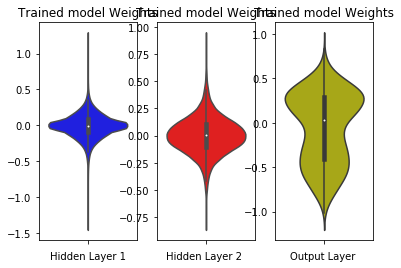

In [30]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [31]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.7522 - acc: 0.7912 - val_loss: 0.3851 - val_acc: 0.8953
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.3552 - acc: 0.8993 - val_loss: 0.2979 - val_acc: 0.9158
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2924 - acc: 0.9173 - val_loss: 0.2600 - val_acc: 0.9264
Epoch 4/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.2585 - acc: 0.9269 - val_loss: 0.2405 - val_acc: 0.9308
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.2352 - acc: 0.9335 - val_loss: 0.2202 - val_acc: 0.9365
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.2171 - acc: 0.9380 - val_loss: 0.2085 - val_acc: 0.9404
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.2023 - acc: 0.9427 - val_loss: 0.1957 - val_acc

Test score: 0.12610071545392273
Test accuracy: 0.9617


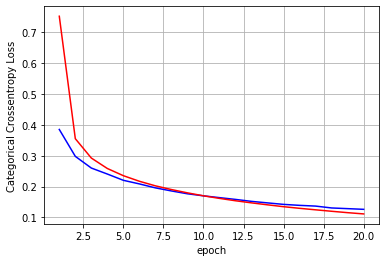

In [33]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

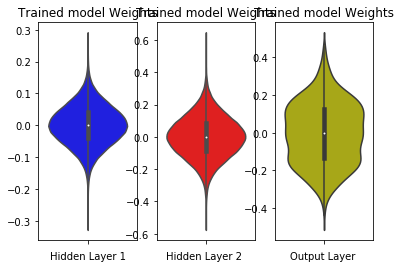

In [34]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU + ADAM </h2>

In [35]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2252 - acc: 0.9319 - val_loss: 0.1124 - val_acc: 0.9659
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0852 - acc: 0.9742 - val_loss: 0.0806 - val_acc: 0.9741
Epoch 3/20
60000/60000 [=========================

Test score: 0.08342993713870042
Test accuracy: 0.9843


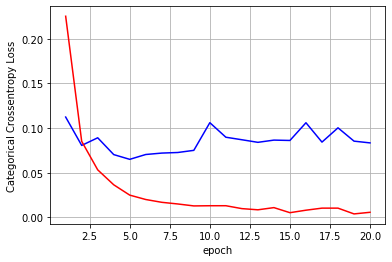

In [36]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

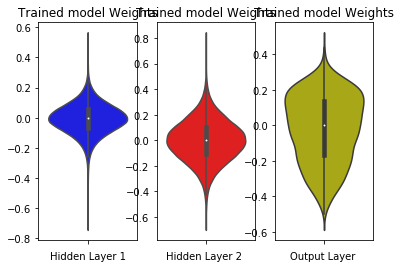

In [37]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [38]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [39]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2960 - acc: 0.9113 - val_loss: 0.2120 - val_acc: 0.9373
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1723 - acc: 0.9495 - val_loss: 0.1736 - val_acc: 0.9471
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1349 - acc: 0.9607 - val_loss: 0.1430 - val_acc: 0.9574
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.1106 - acc: 0.9673 - val_loss: 0.1429 - val_acc: 0.9568
Epoch 5/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0953 - acc: 0.9712 - val_loss: 0.1245 - val_acc: 0.9624
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0797 - acc: 0.9758 - val_loss: 0.1142 - val_acc: 0.9648
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0694 - acc: 0.9791 - val_loss: 0.1101 - val_acc

Test score: 0.10622683503271255
Test accuracy: 0.9737


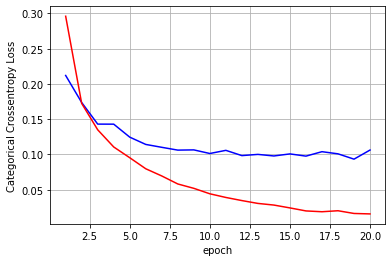

In [40]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

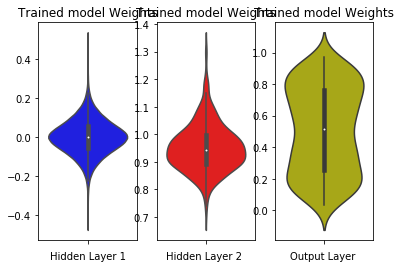

In [41]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5. MLP + Dropout + AdamOptimizer </h2>

In [42]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_____

In [43]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.6715 - acc: 0.7927 - val_loss: 0.2873 - val_acc: 0.9125
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.4303 - acc: 0.8689 - val_loss: 0.2536 - val_acc: 0.9257
Epoch 3/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.3826 - acc: 0.8837 - val_loss: 0.2402 - val_acc: 0.9292
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.3532 - acc: 0.8934 - val_loss: 0.2198 - val_acc: 0.9346
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.3368 - acc: 0.8979 - val_loss: 0.2066 - val_acc: 0.9399
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.3244 - acc: 0.9024 - val_loss: 0.1965 - val_acc: 0.9419
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.3088 - acc: 0.9073 - val_loss: 0.1898 - val_acc

Test score: 0.10995881164651364
Test accuracy: 0.9664


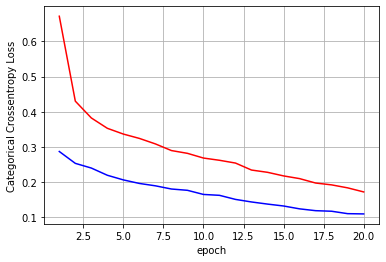

In [44]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

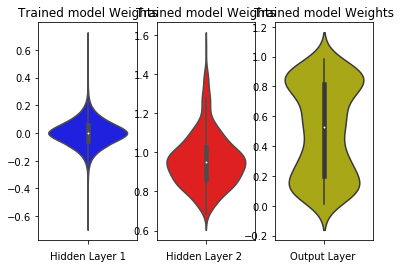

In [45]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Hyper-parameter tuning of Keras models using Sklearn </h2>

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [48]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978583 using {'activ': 'relu'}
0.977783 (0.001954) with: {'activ': 'sigmoid'}
0.978583 (0.001541) with: {'activ': 'relu'}


# Two Hidden layer Architecture



##### **Using RELU Activation and Adam Optimizer**

In [49]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model1 = Sequential()

model1.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))


model1.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )


model1.add(Dense(output_dim, activation='softmax'))


model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 352)               276320    
_________________________________________________________________
dense_54 (Dense)             (None, 52)                18356     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                530       
Total params: 295,206
Trainable params: 295,206
Non-trainable params: 0
_________________________________________________________________


In [50]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2520 - acc: 0.9256 - val_loss: 0.1338 - val_acc: 0.9580
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0972 - acc: 0.9699 - val_loss: 0.1128 - val_acc: 0.9665
Epoch 3/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.0652 - acc: 0.9801 - val_loss: 0.0927 - val_acc: 0.9717
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0484 - acc: 0.9845 - val_loss: 0.0953 - val_acc: 0.9694
Epoch 5/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0355 - acc: 0.9885 - val_loss: 0.0854 - val_acc: 0.9766
Epoch 6/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0306 - acc: 0.9901 - val_loss: 0.1109 - val_acc: 0.9700
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0249 - acc: 0.9919 - val_loss: 0.0891 - val_acc

Test score: 0.10668754959471503
Test accuracy: 0.9769


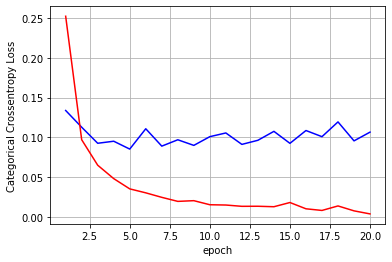

In [51]:
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

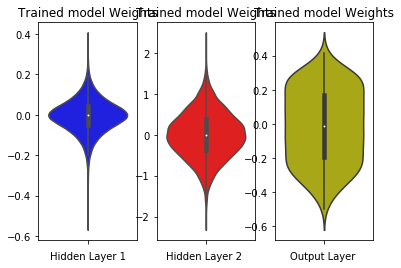

In [52]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Dropout

In [53]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.7))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 352)               276320    
_________________________________________________________________
dropout_3 (Dropout)          (None, 352)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 52)                18356     
_________________________________________________________________
dropout_4 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                530       
Total params: 295,206
Trainable params: 295,206
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 1.3294 - acc: 0.5665 - val_loss: 0.3412 - val_acc: 0.9163
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.7147 - acc: 0.7711 - val_loss: 0.2594 - val_acc: 0.9316
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.5678 - acc: 0.8272 - val_loss: 0.2178 - val_acc: 0.9427
Epoch 4/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.4968 - acc: 0.8510 - val_loss: 0.2039 - val_acc: 0.9473
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.4382 - acc: 0.8706 - val_loss: 0.1824 - val_acc: 0.9531
Epoch 6/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.3978 - acc: 0.8834 - val_loss: 0.1722 - val_acc: 0.9550
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3694 - acc: 0.8918 - val_loss: 0.1599 - val_acc

Test score: 0.13253417925792746
Test accuracy: 0.9708


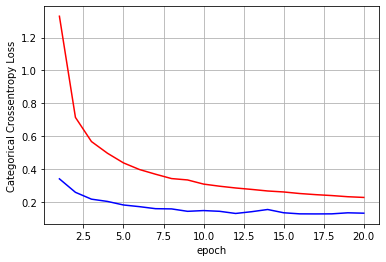

In [55]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

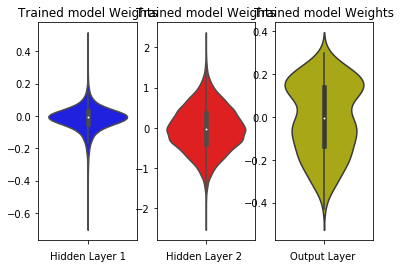

In [56]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization

In [57]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 352)               276320    
_________________________________________________________________
batch_normalization_5 (Batch (None, 352)               1408      
_________________________________________________________________
dense_60 (Dense)             (None, 52)                18356     
_________________________________________________________________
batch_normalization_6 (Batch (None, 52)                208       
_________________________________________________________________
dense_61 (Dense)             (None, 10)                530       
Total params: 296,822
Trainable params: 296,014
Non-trainable params: 808
_________________________________________________________________


In [58]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.2292 - acc: 0.9376 - val_loss: 0.1217 - val_acc: 0.9638
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0858 - acc: 0.9756 - val_loss: 0.0932 - val_acc: 0.9694
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0542 - acc: 0.9838 - val_loss: 0.0933 - val_acc: 0.9707
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0384 - acc: 0.9882 - val_loss: 0.0948 - val_acc: 0.9696
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0294 - acc: 0.9907 - val_loss: 0.0742 - val_acc: 0.9777
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0752 - val_acc: 0.9781
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0866 - val_acc

Test score: 0.07565803507223973
Test accuracy: 0.9806


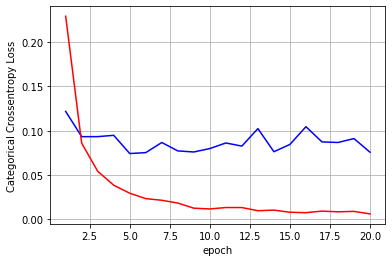

In [59]:
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss 
# val_acc : validation accuracy 

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ;
ax.set_ylabel('Categorical Crossentropy Loss');  

# list of epoch numbers
x = list(range(1,nb_epoch+1)) 

vy = history.history['val_loss'] 
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

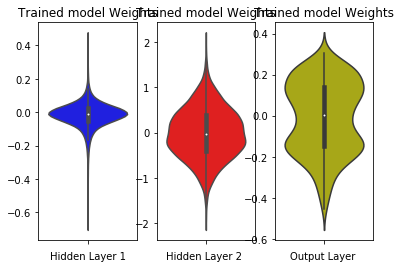

In [84]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()
plt.close()

<h2> Batch Normalization + Dropout   </h2>

In [61]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model3 = Sequential()

model3.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))



model3.add(Dense(output_dim, activation='softmax'))


model3.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 352)               276320    
_________________________________________________________________
batch_normalization_7 (Batch (None, 352)               1408      
_________________________________________________________________
dropout_5 (Dropout)          (None, 352)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 52)                18356     
_________________________________________________________________
batch_normalization_8 (Batch (None, 52)                208       
_________________________________________________________________
dropout_6 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 10)              

In [62]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.5979 - acc: 0.8192 - val_loss: 0.1928 - val_acc: 0.9417
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.3125 - acc: 0.9085 - val_loss: 0.1482 - val_acc: 0.9546
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2578 - acc: 0.9251 - val_loss: 0.1200 - val_acc: 0.9635
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.2192 - acc: 0.9368 - val_loss: 0.1104 - val_acc: 0.9688
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1983 - acc: 0.9427 - val_loss: 0.0974 - val_acc: 0.9715
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1774 - acc: 0.9498 - val_loss: 0.0945 - val_acc: 0.9706
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1635 - acc: 0.9526 - val_loss: 0.0923 - val_acc

Test score: 0.07315509025455104
Test accuracy: 0.979


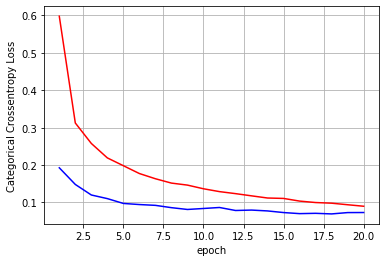

In [63]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

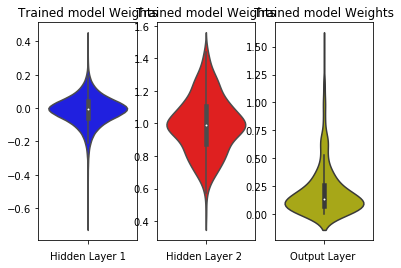

In [64]:
w_after = model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Three Hidden Layer Architecture 

##### **Using RELU Activation and Adam Optimizer**

In [65]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model1 = Sequential()

model1.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))


model1.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )

model1.add(Dense(102, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.6, seed=None)) )

model1.add(Dense(output_dim, activation='softmax'))


model1.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 352)               276320    
_________________________________________________________________
dense_66 (Dense)             (None, 52)                18356     
_________________________________________________________________
dense_67 (Dense)             (None, 102)               5406      
_________________________________________________________________
dense_68 (Dense)             (None, 10)                1030      
Total params: 301,112
Trainable params: 301,112
Non-trainable params: 0
_________________________________________________________________


In [66]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3633 - acc: 0.9046 - val_loss: 0.1766 - val_acc: 0.9475
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1396 - acc: 0.9590 - val_loss: 0.1287 - val_acc: 0.9616
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0965 - acc: 0.9714 - val_loss: 0.1168 - val_acc: 0.9675
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.0773 - acc: 0.9760 - val_loss: 0.1324 - val_acc: 0.9637
Epoch 5/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0646 - acc: 0.9796 - val_loss: 0.1348 - val_acc: 0.9646
Epoch 6/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0517 - acc: 0.9835 - val_loss: 0.1337 - val_acc: 0.9676
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0440 - acc: 0.9863 - val_loss: 0.1049 - val_acc

Test score: 0.13014392414744216
Test accuracy: 0.9767


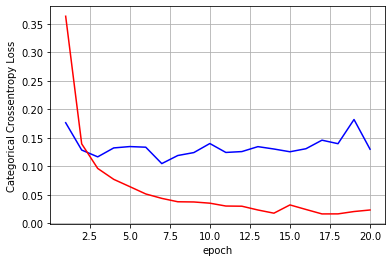

In [67]:
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

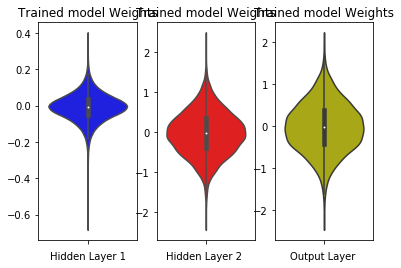

In [68]:
w_after = model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Dropout

In [69]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model1.add(Dense(102, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.6, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 352)               276320    
_________________________________________________________________
dropout_7 (Dropout)          (None, 352)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 52)                18356     
_________________________________________________________________
dropout_8 (Dropout)          (None, 52)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 10)                530       
Total params: 295,206
Trainable params: 295,206
Non-trainable params: 0
_______________________________________________

In [70]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 1.5708 - acc: 0.4904 - val_loss: 0.3985 - val_acc: 0.9120
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.8458 - acc: 0.7161 - val_loss: 0.2862 - val_acc: 0.9282
Epoch 3/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.6915 - acc: 0.7740 - val_loss: 0.2436 - val_acc: 0.9348
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.5985 - acc: 0.8076 - val_loss: 0.2135 - val_acc: 0.9435
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.5376 - acc: 0.8304 - val_loss: 0.2173 - val_acc: 0.9464
Epoch 6/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.5022 - acc: 0.8433 - val_loss: 0.1925 - val_acc: 0.9527
Epoch 7/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.4663 - acc: 0.8554 - val_loss: 0.1797 - val_acc

Test score: 0.1372257164807059
Test accuracy: 0.9668


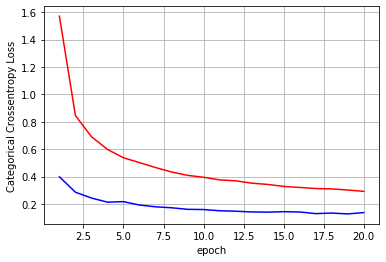

In [71]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

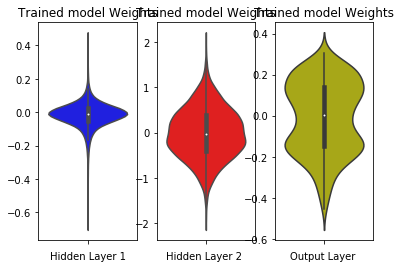

In [72]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization

In [73]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(102, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 352)               276320    
_________________________________________________________________
batch_normalization_9 (Batch (None, 352)               1408      
_________________________________________________________________
dense_74 (Dense)             (None, 52)                18356     
_________________________________________________________________
batch_normalization_10 (Batc (None, 52)                208       
_________________________________________________________________
dense_75 (Dense)             (None, 102)               5406      
_________________________________________________________________
batch_normalization_11 (Batc (None, 102)               408       
_________________________________________________________________
dense_76 (Dense)             (None, 10)              

In [74]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.2560 - acc: 0.9258 - val_loss: 0.1237 - val_acc: 0.9627
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0924 - acc: 0.9721 - val_loss: 0.1167 - val_acc: 0.9627
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0614 - acc: 0.9813 - val_loss: 0.1097 - val_acc: 0.9666
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0465 - acc: 0.9855 - val_loss: 0.0835 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0369 - acc: 0.9876 - val_loss: 0.0784 - val_acc: 0.9750
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0313 - acc: 0.9897 - val_loss: 0.0795 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0253 - acc: 0.9918 - val_loss: 0.0890 - val_ac

Test score: 0.09027723879703226
Test accuracy: 0.9787


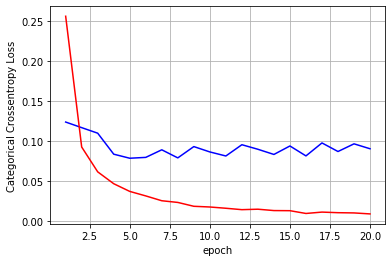

In [75]:
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss 
# val_acc : validation accuracy 

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ;
ax.set_ylabel('Categorical Crossentropy Loss');  

# list of epoch numbers
x = list(range(1,nb_epoch+1)) 

vy = history.history['val_loss'] 
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

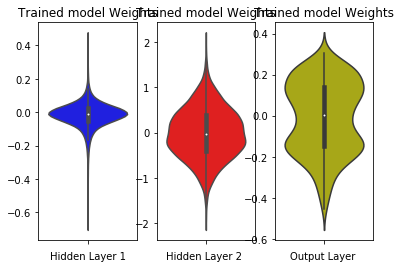

In [76]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()
plt.close()

<h2> Batch Normalization + Dropout   </h2>

In [77]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model3 = Sequential()

model3.add(Dense(352, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(102, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))


model3.add(Dense(output_dim, activation='softmax'))


model3.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 352)               276320    
_________________________________________________________________
batch_normalization_12 (Batc (None, 352)               1408      
_________________________________________________________________
dropout_10 (Dropout)         (None, 352)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 52)                18356     
_________________________________________________________________
batch_normalization_13 (Batc (None, 52)                208       
_________________________________________________________________
dropout_11 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_79 (Dense)             (None, 102)             

In [78]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.9735 - acc: 0.6879 - val_loss: 0.2488 - val_acc: 0.9267
Epoch 2/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.4623 - acc: 0.8618 - val_loss: 0.1765 - val_acc: 0.9454
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3619 - acc: 0.8964 - val_loss: 0.1529 - val_acc: 0.9550
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.3122 - acc: 0.9128 - val_loss: 0.1309 - val_acc: 0.9603
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2734 - acc: 0.9225 - val_loss: 0.1171 - val_acc: 0.9671
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2464 - acc: 0.9304 - val_loss: 0.1163 - val_acc: 0.9658
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2261 - acc: 0.9372 - val_loss: 0.1132 - val_ac

Test score: 0.08018281710293376
Test accuracy: 0.9792


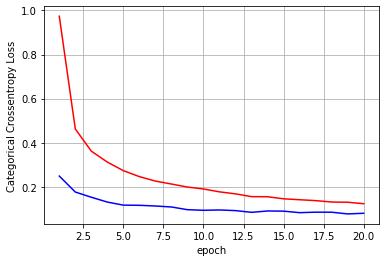

In [79]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

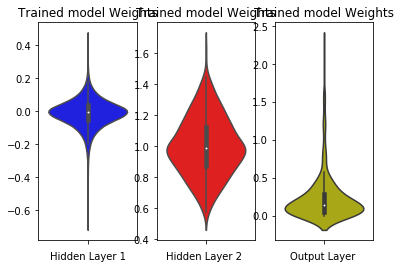

In [80]:
w_after = model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Five Layer Architecture

##### **Using RELU Activation and Adam Optimizer**

In [91]:
model_relu = Sequential()
model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(146, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_relu.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_relu.add(Dense(40, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.5, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_94 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_95 (Dense)             (None, 146)               22046     
_________________________________________________________________
dense_96 (Dense)             (None, 60)                8820      
_________________________________________________________________
dense_97 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_98 (Dense)             (None, 10)                410       
Total params: 267,616
Trainable params: 267,616
Non-trainable params: 0
_______________________________________________

In [92]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.3360 - acc: 0.9028 - val_loss: 0.1423 - val_acc: 0.9570
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1223 - acc: 0.9639 - val_loss: 0.1142 - val_acc: 0.9638
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0848 - acc: 0.9738 - val_loss: 0.0979 - val_acc: 0.9721
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0639 - acc: 0.9802 - val_loss: 0.1029 - val_acc: 0.9688
Epoch 5/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0529 - acc: 0.9832 - val_loss: 0.0985 - val_acc: 0.9701
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0453 - acc: 0.9850 - val_loss: 0.0847 - val_acc: 0.9762
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0388 - acc: 0.9875 - val_loss: 0.0940 - val_acc

Test score: 0.12134343287702913
Test accuracy: 0.9743


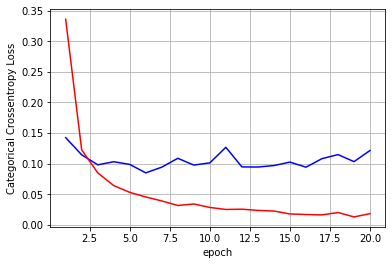

In [93]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

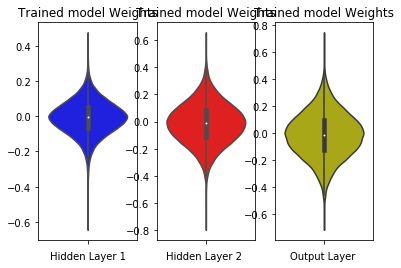

In [94]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()
plt.close()

## With Dropout

In [85]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()


model_drop.add(Dense(250, activation='relu', input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(150, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None) ))
model_drop.add(Dropout(0.5))
                                                    
model_drop.add(Dense(146, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None) ))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(60, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None) ))
model_drop.add(Dropout(0.5))
                                                    
model_drop.add(Dense(40, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None) ))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))
print(model_drop.summary())


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 250)               196250    
_________________________________________________________________
dropout_13 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 150)               37650     
_________________________________________________________________
dropout_14 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 146)               22046     
_________________________________________________________________
dropout_15 (Dropout)         (None, 146)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 60)              

In [86]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 2.3843 - acc: 0.1383 - val_loss: 1.8483 - val_acc: 0.4532
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 1.5475 - acc: 0.4169 - val_loss: 1.0906 - val_acc: 0.6451
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.1712 - acc: 0.5643 - val_loss: 0.8176 - val_acc: 0.7626
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.9148 - acc: 0.6899 - val_loss: 0.5543 - val_acc: 0.8483
Epoch 5/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.7204 - acc: 0.7777 - val_loss: 0.4719 - val_acc: 0.8741
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.6096 - acc: 0.8303 - val_loss: 0.3595 - val_acc: 0.9196
Epoch 7/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.5343 - acc: 0.8612 - val_loss: 0.2917 - val_acc

Test score: 0.16367745212987064
Test accuracy: 0.9662


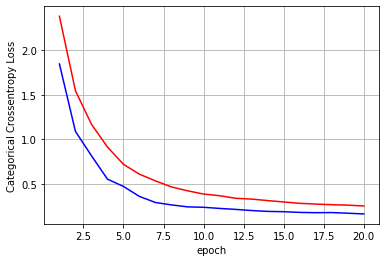

In [88]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

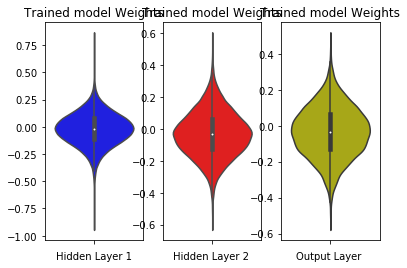

In [90]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization

In [95]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(146, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model_batch.add(BatchNormalization())

model_drop.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_batch.add(BatchNormalization())

model_drop.add(Dense(40, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.6, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 250)               196250    
_________________________________________________________________
batch_normalization_15 (Batc (None, 250)               1000      
_________________________________________________________________
dense_100 (Dense)            (None, 150)               37650     
_________________________________________________________________
batch_normalization_16 (Batc (None, 150)               600       
_________________________________________________________________
dense_101 (Dense)            (None, 146)               22046     
_________________________________________________________________
batch_normalization_17 (Batc (None, 146)               584       
_________________________________________________________________
batch_normalization_18 (Batc (None, 146)             

In [96]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.2259 - acc: 0.9315 - val_loss: 0.1145 - val_acc: 0.9643
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0863 - acc: 0.9736 - val_loss: 0.0981 - val_acc: 0.9702
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0583 - acc: 0.9819 - val_loss: 0.0806 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0449 - acc: 0.9854 - val_loss: 0.1113 - val_acc: 0.9627
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0316 - acc: 0.9900 - val_loss: 0.0823 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0806 - val_acc: 0.9775
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0225 - acc: 0.9923 - val_loss: 0.0897 - val_ac

Test score: 0.08622197609168743
Test accuracy: 0.9792


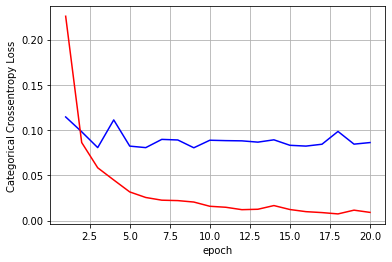

In [97]:
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss 
# val_acc : validation accuracy 

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ;
ax.set_ylabel('Categorical Crossentropy Loss');  

# list of epoch numbers
x = list(range(1,nb_epoch+1)) 

vy = history.history['val_loss'] 
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

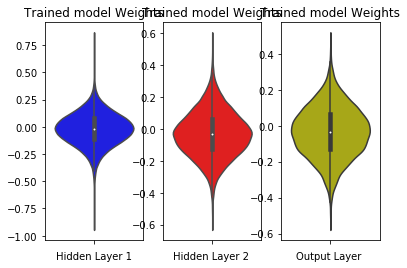

In [98]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()
plt.close()

<h2> Batch Normalization + Dropout   </h2>

In [99]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model3 = Sequential()

model3.add(Dense(250, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(146, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.15, seed=None)) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(40, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.6, seed=None)) )
model3.add(BatchNormalization())
model3.add(Dropout(0.5))


model3.add(Dense(output_dim, activation='softmax'))


model3.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 250)               196250    
_________________________________________________________________
batch_normalization_20 (Batc (None, 250)               1000      
_________________________________________________________________
dropout_18 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 150)               37650     
_________________________________________________________________
batch_normalization_21 (Batc (None, 150)               600       
_________________________________________________________________
dropout_19 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 146)             

In [100]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 176us/step - loss: 1.8646 - acc: 0.3724 - val_loss: 0.6914 - val_acc: 0.8356
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.9432 - acc: 0.6832 - val_loss: 0.3925 - val_acc: 0.9030
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.6758 - acc: 0.7879 - val_loss: 0.2720 - val_acc: 0.9294
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.5389 - acc: 0.8472 - val_loss: 0.2094 - val_acc: 0.9448
Epoch 5/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.4560 - acc: 0.8775 - val_loss: 0.1955 - val_acc: 0.9483
Epoch 6/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.4007 - acc: 0.8953 - val_loss: 0.1827 - val_acc: 0.9521
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.3588 - acc: 0.9081 - val_loss: 0.1637 -

Test score: 0.11095908558527008
Test accuracy: 0.9735


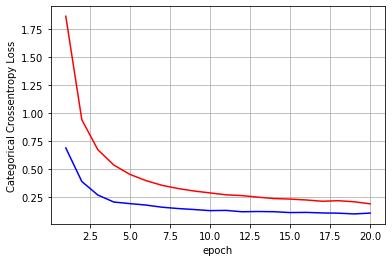

In [101]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

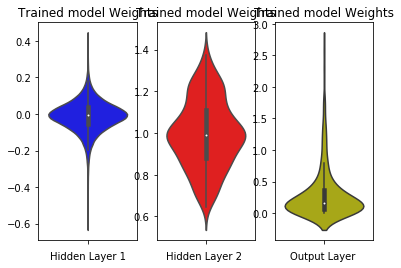

In [102]:
w_after = model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## CONCLUSION

In [103]:
from prettytable import PrettyTable

x=PrettyTable()

x.field_names=(['No.of.Layers','Layers in MLP','Model Type','Test Score','Test accuracy'])

x.add_row(['2-Layered','352-52','Without Dropout and BN',0.10,0.97])
x.add_row(['2-Layered','352-52','With Dropout',0.13,0.96])
x.add_row(['2-Layered','352-52','With BN',0.08,0.98])
x.add_row(['2-Layered','352-52','Dropout+BN',0.072,0.97])


print(x)

+--------------+---------------+------------------------+------------+---------------+
| No.of.Layers | Layers in MLP |       Model Type       | Test Score | Test accuracy |
+--------------+---------------+------------------------+------------+---------------+
|  2-Layered   |     352-52    | Without Dropout and BN |    0.1     |      0.97     |
|  2-Layered   |     352-52    |      With Dropout      |    0.13    |      0.96     |
|  2-Layered   |     352-52    |        With BN         |    0.08    |      0.98     |
|  2-Layered   |     352-52    |       Dropout+BN       |   0.072    |      0.97     |
+--------------+---------------+------------------------+------------+---------------+


In [104]:
y=PrettyTable()

y.field_names=(['No.of.Layers','Layers in MLP','Model Type','Test Score','Test Value'])

y.add_row(['3-Layered','352-52-102','Without Dropout and BN',0.15,0.975])
y.add_row(['3-Layered','352-52-102','With Dropout',0.14,0.967])
y.add_row(['3-Layered','352-52-102','With BN',0.09,0.979])
y.add_row(['3-Layered','352-52-102','Dropout+BN',0.07,0.978])


print(y)

+--------------+---------------+------------------------+------------+------------+
| No.of.Layers | Layers in MLP |       Model Type       | Test Score | Test Value |
+--------------+---------------+------------------------+------------+------------+
|  3-Layered   |   352-52-102  | Without Dropout and BN |    0.15    |   0.975    |
|  3-Layered   |   352-52-102  |      With Dropout      |    0.14    |   0.967    |
|  3-Layered   |   352-52-102  |        With BN         |    0.09    |   0.979    |
|  3-Layered   |   352-52-102  |       Dropout+BN       |    0.07    |   0.978    |
+--------------+---------------+------------------------+------------+------------+


In [108]:
z=PrettyTable()

z.field_names=(['No.of.Layers','Layers in MLP','Model Type','Test Score','Test Value'])

z.add_row(['5-Layered','250-150-146-60-40','With Dropout and BN',0.12,0.974])
z.add_row(['5-Layered','250-150-146-60-40','With Dropout',0.16,0.966])
z.add_row(['5-Layered','250-150-146-60-40','With BN',0.08,0.979])
z.add_row(['5-Layered','250-150-146-60-40','Dropout+BN',0.11,0.973])


print(z)

+--------------+-------------------+---------------------+------------+------------+
| No.of.Layers |   Layers in MLP   |      Model Type     | Test Score | Test Value |
+--------------+-------------------+---------------------+------------+------------+
|  5-Layered   | 250-150-146-60-40 | With Dropout and BN |    0.12    |   0.974    |
|  5-Layered   | 250-150-146-60-40 |     With Dropout    |    0.16    |   0.966    |
|  5-Layered   | 250-150-146-60-40 |       With BN       |    0.08    |   0.979    |
|  5-Layered   | 250-150-146-60-40 |      Dropout+BN     |    0.11    |   0.973    |
+--------------+-------------------+---------------------+------------+------------+


**1)Here we have use Mutli-Layered perceptrons Architecture where we have used 2-Layered, 3-Layered and 5-Layered Structures, with different number of neurons.**<br>
**2)By using 2-layered Architecture with 352-52 neurons, we have seen that by adding Batch Normalization gave highest accuracy.**<br>
**3)By using 3-Layered Architecture with 352-52-102 neurons, we have seen that batch normalization and both droput and batch normalization gave highest accuracy**<br>
**4)By using 5-Layered Architecture with 250-150-146-60-40 neurons, adding batch normalization gave highest accuracy.**
